<a href="https://colab.research.google.com/github/Rudraraju-krishnam-raju/Machine-Learning/blob/main/Multi_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
# importing modules
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt

import seaborn as sb

In [121]:
# Reading the csv file.
dt=pa.read_csv("/content/50_Startups.csv")

In [122]:
#info of the data

dt.info

<bound method DataFrame.info of     R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida

In [123]:
# To know the Datatype
dt.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [124]:
# Checking  there are any null values in  data and cleaning .
dt.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [125]:
# retrieve the first five rows of the data
dt.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [126]:
#retrieve last five rows of data
dt.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [127]:
# To find mean, std,min. for all the columns 
dt.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [128]:
dt.describe().loc['mean']

R&D Spend           73721.6156
Administration     121344.6396
Marketing Spend    211025.0978
Profit             112012.6392
Name: mean, dtype: float64

In [129]:

# Plotting a bar graph
plt.show()

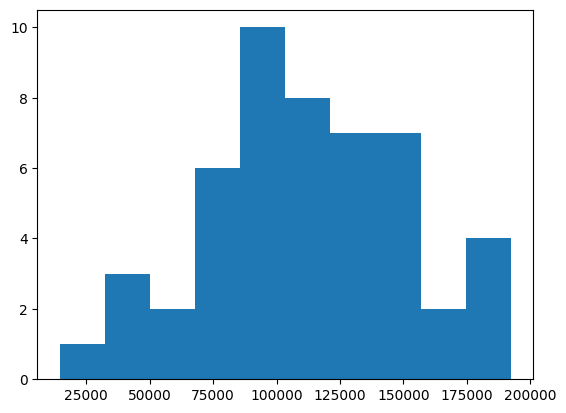

In [130]:
plt.hist(dt['Profit'])
plt.show()

In [131]:
# correlation matrix for data
da = dt.corr()
da

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [132]:
da.shape

(4, 4)

<Axes: >

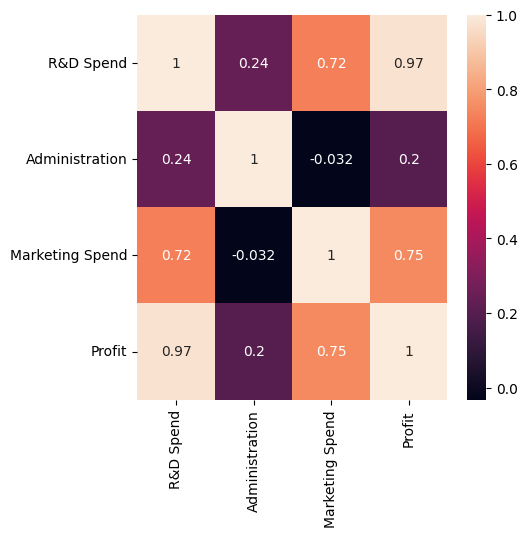

In [133]:
# Plotting a heatmap for the correlatiion matrix
plt.figure(figsize = (5,5))
sb.heatmap(da,annot = True)

In [134]:
x = dt.iloc[:,:-1]
x = x.select_dtypes(include = np.number)
y = dt.iloc[:,-1]

In [135]:
print(y)

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64


In [136]:
print(x)

    R&D Spend  Administration  Marketing Spend
0   165349.20       136897.80        471784.10
1   162597.70       151377.59        443898.53
2   153441.51       101145.55        407934.54
3   144372.41       118671.85        383199.62
4   142107.34        91391.77        366168.42
5   131876.90        99814.71        362861.36
6   134615.46       147198.87        127716.82
7   130298.13       145530.06        323876.68
8   120542.52       148718.95        311613.29
9   123334.88       108679.17        304981.62
10  101913.08       110594.11        229160.95
11  100671.96        91790.61        249744.55
12   93863.75       127320.38        249839.44
13   91992.39       135495.07        252664.93
14  119943.24       156547.42        256512.92
15  114523.61       122616.84        261776.23
16   78013.11       121597.55        264346.06
17   94657.16       145077.58        282574.31
18   91749.16       114175.79        294919.57
19   86419.70       153514.11             0.00
20   76253.86

In [137]:
x.shape,y.shape

((50, 3), (50,))

In [138]:
# Converting the 1-D col to 2-D col.
y = np.array(y)
y = y.reshape(-1,1)
     


In [139]:
y.shape

(50, 1)

In [140]:
# Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state = 32)
     

In [141]:
# Checking the shape of the training datasns.heatmap(d,annot = True)
x_train.shape,y_train.shape

((35, 3), (35, 1))

In [142]:
# Checking the shape of the testing data
x_test.shape,y_test.shape
     

((15, 3), (15, 1))

In [143]:
# importing  linear_model
from sklearn import linear_model

In [144]:
#Fitting a regression model
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [144]:
sns.heatmap(d,annot = True)

In [145]:
# Evaluating the model on training data only
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred1 = reg.predict(x_train)
print(f'Performance of the model on training data :\n')
print(f'MAE = {mean_absolute_error(y_train, y_pred1)}')
print(f'MSE = {mean_squared_error(y_train, y_pred1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_pred1))}')
print(f'R_2 = {r2_score(y_train, y_pred1)}')


Performance of the model on training data :

MAE = 5485.293579118111
MSE = 48804147.476301275
RMSE = 6985.996527074808
R_2 = 0.967462433557256


In [146]:
#Evaluating the model on testing data only
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred2 = reg.predict(x_test)
print(f'Performance of the model on test data :\n')
print(f'MAE = {mean_absolute_error(y_test, y_pred2)}')
print(f'MSE = {mean_squared_error(y_test, y_pred2)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred2))}')
print(f'R_2 = {r2_score(y_test, y_pred2)}')

Performance of the model on test data :

MAE = 8838.451739639082
MSE = 151507501.20898917
RMSE = 12308.838337105139
R_2 = 0.9065521225506566


In [147]:

# importing Lasso
from sklearn.linear_model import Lasso

In [148]:
reg = Lasso(alpha = 0.1)
reg.fit(x_train,y_train)

Lasso(alpha=0.1)

In [149]:
# Evaluating the model on training data only
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_predict = reg.predict(x_train)
print(f'Performance of the model on training data :\n')
print(f'MAE = {mean_absolute_error(y_train, y_predict)}')
print(f'MSE = {mean_squared_error(y_train, y_predict)}')sns.heatmap(d,annot = True)
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_predict))}')
print(f'R_2 = {r2_score(y_train, y_predict)}')
     

Performance of the model on training data :

MAE = 5485.293578794194
MSE = 48804147.476301216
RMSE = 6985.996527074803
R_2 = 0.967462433557256


In [150]:
# Evaluating the model on testing data only
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_predict1 = reg.predict(x_test)
print(f'Performance of the model on test data :\n')
print(f'MAE = {mean_absolute_error(y_test, y_predict1)}')
print(f'MSE = {mean_squared_error(y_test, y_predict1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_predict1))}')
print(f'R_2 = {r2_score(y_test, y_predict1)}')

Performance of the model on test data :

MAE = 8838.451741282928
MSE = 151507501.22136527
RMSE = 12308.83833760787
R_2 = 0.9065521225430233


In [151]:
from sklearn.linear_model import Ridgesns.heatmap(d,annot = True)

In [152]:
reg = Ridge(alpha = 0.8)
reg.fit(x_train,y_train)

Ridge(alpha=0.8)

In [153]:
# Evaluating the model on training data only
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_predict = reg.predict(x_train)
print(f'Performance of the model on training data :\n')
print(f'MAE = {mean_absolute_error(y_train, y_predict)}')
print(f'MSE = {mean_squared_error(y_train, y_predict)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_predict))}')
print(f'R_2 = {r2_score(y_train, y_predict)}')

Performance of the model on training data :

MAE = 5485.293579117144
MSE = 48804147.47630123
RMSE = 6985.996527074804
R_2 = 0.967462433557256


In [154]:
# Evaluating the model on testing data only
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_predict1 = reg.predict(x_test)
print(f'Performance of the model on test data :\n')sns.heatmap(d,annot = True)
print(f'MAE = {mean_absolute_error(y_test, y_predict1)}')
print(f'MSE = {mean_squared_error(y_test, y_predict1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_predict1))}')
print(f'R_2 = {r2_score(y_test, y_predict1)}')

Performance of the model on test data :

MAE = 8838.451739615055
MSE = 151507501.20981497
RMSE = 12308.838337138683
R_2 = 0.9065521225501474
